In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

DR_NO = Records Number

Date Rptd = Date of crime reported

DATE OCC = Date of crime occurrence

TIME OCC = Time on which crime occured

AREA = Geographic Area codes in city

AREA NAME = Name of the area

Rptd Dist No = Reporting Districts on the LA City

Crm Cd = Indicates the crime committed.

Crm Cd Desc = Defines the Crime Code provided.

Mocodes = Activities associated with the suspect in commission of the crime

Vict Age = Age of Vict

Vict Sex = Gender (x = Unknown)

Vict Descent = Descent Code (Ethnicity)

Premis Cd =  Type of structure, vehicle, or location where the crime took place

Premis Desc = Defines the Premis Cd above

Weapon Used Cd = Type of Weapon used in Crime

Weapon Desc = Defines Weapon Used Cd above

Status = Case Status

Status Desc = Defines Case Status

Crm Cd 1 = Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious

Crm Cd 2 =  less serious than Crime Code 1

Cem Cd 3 =  less serious than Crime Code 1

Crm Cd 4 =  less serious than Crime Code 1

LOCATION = 	Street address of crime incident rounded to the nearest hundred block to maintain anonymity

Cross Street = Cross Street of rounded Address

LAT = Latitude

LON = LONGITUDE





In [ ]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,251004092,01/25/2025 12:00:00 AM,01/24/2025 12:00:00 AM,1240,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837
1005046,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233
1005047,251104089,02/02/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1730,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004
1005048,252104053,01/19/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005050 non-null  int64  
 1   Date Rptd       1005050 non-null  object 
 2   DATE OCC        1005050 non-null  object 
 3   TIME OCC        1005050 non-null  int64  
 4   AREA            1005050 non-null  int64  
 5   AREA NAME       1005050 non-null  object 
 6   Rpt Dist No     1005050 non-null  int64  
 7   Part 1-2        1005050 non-null  int64  
 8   Crm Cd          1005050 non-null  int64  
 9   Crm Cd Desc     1005050 non-null  object 
 10  Mocodes         853358 non-null   object 
 11  Vict Age        1005050 non-null  int64  
 12  Vict Sex        860330 non-null   object 
 13  Vict Descent    860318 non-null   object 
 14  Premis Cd       1005034 non-null  float64
 15  Premis Desc     1004462 non-null  object 
 16  Weapon Used Cd  327234 non-null   fl

# Data Cleaning

Extract date_rptd and time_rptd from DATE RPTD column
Extract date_occ and time_occ from DATE occ column

And then delete DATE RPTD, DATE OCC and TIME OCC

In [ ]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'],format = "mixed")
df['date_rptd'] = df['Date Rptd'].dt.date

df.drop('Date Rptd', axis=1, inplace=True)
df

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,date_rptd
0,190326475,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01
1,200106753,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-09
2,200320258,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-11
3,200907217,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2023-05-10
4,200412582,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,251004092,01/24/2025 12:00:00 AM,1240,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 0344 0385,...,Invest Cont,331.0,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837,2025-01-25
1005046,251704066,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,0400 1259 1822 0356,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17
1005047,251104089,01/30/2025 12:00:00 AM,1730,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,0344 1302 1307,...,Invest Cont,330.0,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004,2025-02-02
1005048,252104053,01/17/2025 12:00:00 AM,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,...,Invest Cont,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103,2025-01-19


In [ ]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'],format = "mixed")
df['date_occ'] = df['DATE OCC'].dt.date

df.drop('DATE OCC', axis=1, inplace=True)
df

,DR_NO,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,date_rptd,date_occ
0,190326475,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,...,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01,2020-03-01
1,200106753,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,...,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-09,2020-02-08
2,200320258,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,...,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-11,2020-11-04
3,200907217,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,...,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2023-05-10,2020-03-10
4,200412582,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,...,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09,2020-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,251004092,1240,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 0344 0385,68,...,331.0,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837,2025-01-25,2025-01-24
1005046,251704066,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,0400 1259 1822 0356,17,...,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17,2025-01-17
1005047,251104089,1730,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,0344 1302 1307,32,...,330.0,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004,2025-02-02,2025-01-30
1005048,252104053,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,0,...,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103,2025-01-19,2025-01-17


Convert Time occ into normal format like HH:MM

In [ ]:
def time_conversion(time_occ):
  time_str = str(time_occ).zfill(4)
  return f"{time_str[:2]}:{time_str[2:]}"

df['time_occ'] = df['TIME OCC'].apply(time_conversion)
df.drop('TIME OCC', axis=1, inplace=True)
df

,DR_NO,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,date_rptd,date_occ,time_occ
0,190326475,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,...,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01,2020-03-01,21:30
1,200106753,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,...,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-09,2020-02-08,18:00
2,200320258,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,...,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-11,2020-11-04,17:00
3,200907217,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,...,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2023-05-10,2020-03-10,20:37
4,200412582,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,...,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09,2020-09-09,06:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,251004092,10,West Valley,1008,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 0344 0385,68,M,...,NaN,NaN,NaN,7600 WOODLEY AV,NaN,34.2085,-118.4837,2025-01-25,2025-01-24,12:40
1005046,251704066,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,0400 1259 1822 0356,17,M,...,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17,2025-01-17,16:00
1005047,251104089,11,Northeast,1101,1,330,BURGLARY FROM VEHICLE,0344 1302 1307,32,F,...,NaN,NaN,NaN,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004,2025-02-02,2025-01-30,17:30
1005048,252104053,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,0,M,...,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103,2025-01-19,2025-01-17,15:30


Dropping unecessary columns


In [ ]:
columns_to_drop = ['DR_NO', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Premis Cd', 'Crm Cd', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']

existing_columns = df.columns
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)
df

,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,date_rptd,date_occ,time_occ
0,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01,2020-03-01,21:30
1,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-09,2020-02-08,18:00
2,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-11,2020-11-04,17:00
3,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2023-05-10,2020-03-10,20:37
4,Hollenbeck,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,IC,Invest Cont,510.0,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09,2020-09-09,06:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,West Valley,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,O,PARKING LOT,NaN,NaN,IC,Invest Cont,331.0,7600 WOODLEY AV,NaN,34.2085,-118.4837,2025-01-25,2025-01-24,12:40
1005046,Devonshire,BATTERY - SIMPLE ASSAULT,17,M,H,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17,2025-01-17,16:00
1005047,Northeast,BURGLARY FROM VEHICLE,32,F,H,PARK/PLAYGROUND,NaN,NaN,IC,Invest Cont,330.0,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004,2025-02-02,2025-01-30,17:30
1005048,Topanga,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,M,W,JUNIOR HIGH SCHOOL,NaN,NaN,IC,Invest Cont,341.0,22200 ELKWOOD ST,NaN,34.2128,-118.6103,2025-01-19,2025-01-17,15:30


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df_income = pd.read_csv('Median_Income_and_AMI_(census_tract).csv')
df_income

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,6037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241
1,6037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,6037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,6037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022
4,6037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,6037554516,126450.0,1215,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4837,1.555650e+07,21274.227408
2491,6037554517,107672.0,1352,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4838,1.421767e+07,15905.089174
2492,6037554518,104439.0,1558,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4839,1.938903e+07,21218.412991
2493,6037554519,131012.0,1216,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4840,1.866694e+07,19500.866806


In [ ]:
#from google.colab import files
#uploaded = files.upload()

'06037218500'

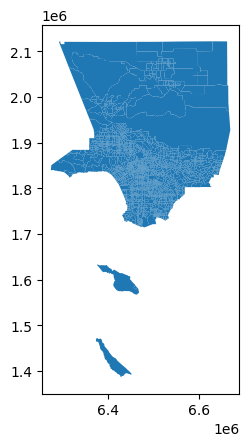

In [ ]:
census_tracts_gdf = gpd.read_file('Median_Income_and_AMI_(census_tract).shp')

census_tracts_gdf.plot()

def get_census_tract(lat_lon, census_tracts_gdf):
    lat, lon = lat_lon[0], lat_lon[1]

    point = Point(lon, lat)
    point_gdf = gpd.GeoDataFrame([{'geometry': point}], crs="EPSG:4326")


    point_gdf = point_gdf.to_crs("EPSG:2229")

    # spatial join
    joined_gdf = gpd.sjoin(point_gdf, census_tracts_gdf, how="inner", predicate='intersects')

    # Extracting the tract information
    if not joined_gdf.empty:
        return joined_gdf.iloc[0]['tract']
    else:
        print(f"No tract found for coordinates ({lat}, {lon})")
        return np.nan


get_census_tract((34.0375, -118.3506), census_tracts_gdf)

In [ ]:
census_tracts_gdf.sindex

points_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LON, df.LAT), crs="EPSG:4326")

points_gdf = points_gdf.to_crs("EPSG:2229")

# Partil and spatial join
joined_gdf = gpd.sjoin(points_gdf, census_tracts_gdf, how='left', predicate='intersects')

df['tract'] = joined_gdf['tract']

df['tract'] = pd.to_numeric(df['tract'], errors='coerce')


In [ ]:
df_household = df_income[['tract', 'med_hh_income', 'med_hh_income_universe']]
df_household['tract'] = df_household['tract'].astype(np.float64)

df_household

,tract,med_hh_income,med_hh_income_universe
0,6.037200e+09,38892.0,1204
1,6.037200e+09,41027.0,903
2,6.037200e+09,42500.0,612
3,6.037200e+09,37232.0,845
4,6.037201e+09,65000.0,782
...,...,...,...
2490,6.037555e+09,126450.0,1215
2491,6.037555e+09,107672.0,1352
2492,6.037555e+09,104439.0,1558
2493,6.037555e+09,131012.0,1216


In [ ]:
df_new = pd.merge(df, df_household, how='left', left_on='tract', right_on='tract')
df_new.rename(columns={'med_hh_income': 'Median Household Income', 'med_hh_income_universe': 'Household'}, inplace=True)

df_new

,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,...,LOCATION,Cross Street,LAT,LON,date_rptd,date_occ,time_occ,tract,Median Household Income,Household
0,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,NaN,AA,Adult Arrest,...,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01,2020-03-01,21:30,6.037218e+09,43156.0,959.0
1,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,...,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-09,2020-02-08,18:00,6.037208e+09,68333.0,1510.0
2,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,...,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-11,2020-11-04,17:00,6.037222e+09,57969.0,1229.0
3,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,NaN,IC,Invest Cont,...,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2023-05-10,2020-03-10,20:37,6.037129e+09,118609.0,979.0
4,Hollenbeck,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,NaN,IC,Invest Cont,...,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09,2020-09-09,06:30,6.037199e+09,49449.0,1515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005045,West Valley,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,O,PARKING LOT,NaN,NaN,IC,Invest Cont,...,7600 WOODLEY AV,NaN,34.2085,-118.4837,2025-01-25,2025-01-24,12:40,6.037980e+09,NaN,17.0
1005046,Devonshire,BATTERY - SIMPLE ASSAULT,17,M,H,HIGH SCHOOL,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,...,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17,2025-01-17,16:00,6.037115e+09,NaN,11.0
1005047,Northeast,BURGLARY FROM VEHICLE,32,F,H,PARK/PLAYGROUND,NaN,NaN,IC,Invest Cont,...,2800 E OBSERVATORY RD,NaN,34.1192,-118.3004,2025-02-02,2025-01-30,17:30,6.037980e+09,NaN,0.0
1005048,Topanga,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,M,W,JUNIOR HIGH SCHOOL,NaN,NaN,IC,Invest Cont,...,22200 ELKWOOD ST,NaN,34.2128,-118.6103,2025-01-19,2025-01-17,15:30,6.037134e+09,68438.0,938.0


In [ ]:
null_values = df_new.isnull().sum()
duplicates = df_new.duplicated().sum()

print("null_values :", null_values, '\n')
print("duplicates :", duplicates,'\n')

null_values : AREA NAME                       0
Crm Cd Desc                     0
Vict Age                        0
Vict Sex                   144720
Vict Descent               144732
Premis Desc                   588
Weapon Used Cd             677816
Weapon Desc                677816
Status                          1
Status Desc                     0
Crm Cd 1                       11
LOCATION                        0
Cross Street               850816
LAT                             0
LON                             0
date_rptd                       0
date_occ                        0
time_occ                        0
tract                        2473
Median Household Income     22116
Household                    2473
dtype: int64 

duplicates : 4432 



In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005050 entries, 0 to 1005049
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   AREA NAME                1005050 non-null  object 
 1   Crm Cd Desc              1005050 non-null  object 
 2   Vict Age                 1005050 non-null  int64  
 3   Vict Sex                 860330 non-null   object 
 4   Vict Descent             860318 non-null   object 
 5   Premis Desc              1004462 non-null  object 
 6   Weapon Used Cd           327234 non-null   float64
 7   Weapon Desc              327234 non-null   object 
 8   Status                   1005049 non-null  object 
 9   Status Desc              1005050 non-null  object 
 10  Crm Cd 1                 1005039 non-null  float64
 11  LOCATION                 1005050 non-null  object 
 12  Cross Street             154234 non-null   object 
 13  LAT                      1005050 non-null 

Vict_Sex ,
Vict_Descent,
Pemis Desc,
Weapon Used Cd
Weapon Desc,
Status
Crm Cd 1
Cross Street
tract
Median Household Income
Household


In [ ]:
# Fill missing columns
df_new['Vict Sex'].fillna('X', inplace = True)
df_new['Vict Descent'].fillna('X', inplace = True)
df_new['Premis Desc'].fillna('x',inplace = True)
df_new['Weapon Desc'].fillna('x',inplace = True)
df_new['Status'].fillna('x',inplace = True)
df_new['Cross Street'].fillna('x',inplace = True)


In [ ]:
# drop all rows with missing numerical values and drop duplicates
df_new_clean = df_new.dropna(subset=['LAT', 'LON', 'Median Household Income', 'Household'])
df_new_clean = df_new_clean.drop_duplicates(keep='first')

In [ ]:
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978656 entries, 0 to 1005049
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AREA NAME                978656 non-null  object 
 1   Crm Cd Desc              978656 non-null  object 
 2   Vict Age                 978656 non-null  int64  
 3   Vict Sex                 978656 non-null  object 
 4   Vict Descent             978656 non-null  object 
 5   Premis Desc              978656 non-null  object 
 6   Weapon Used Cd           318423 non-null  float64
 7   Weapon Desc              978656 non-null  object 
 8   Status                   978656 non-null  object 
 9   Status Desc              978656 non-null  object 
 10  Crm Cd 1                 978645 non-null  float64
 11  LOCATION                 978656 non-null  object 
 12  Cross Street             978656 non-null  object 
 13  LAT                      978656 non-null  float64
 14  LON     

In [ ]:
# Fill missing values
df_new_clean['Weapon Used Cd'].fillna(0, inplace=True)
df_new_clean['Crm Cd 1'].fillna(0, inplace=True)

In [ ]:
df_new_clean

,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,...,LOCATION,Cross Street,LAT,LON,date_rptd,date_occ,time_occ,tract,Median Household Income,Household
0,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,0.0,x,AA,Adult Arrest,...,1900 S LONGWOOD AV,x,34.0375,-118.3506,2020-03-01,2020-03-01,21:30,6.037218e+09,43156.0,959.0
1,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),0.0,x,IC,Invest Cont,...,1000 S FLOWER ST,x,34.0444,-118.2628,2020-02-09,2020-02-08,18:00,6.037208e+09,68333.0,1510.0
2,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,x,IC,Invest Cont,...,1400 W 37TH ST,x,34.0210,-118.3002,2020-11-11,2020-11-04,17:00,6.037222e+09,57969.0,1229.0
3,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,0.0,x,IC,Invest Cont,...,14000 RIVERSIDE DR,x,34.1576,-118.4387,2023-05-10,2020-03-10,20:37,6.037129e+09,118609.0,979.0
4,Hollenbeck,VEHICLE - STOLEN,0,X,X,STREET,0.0,x,IC,Invest Cont,...,200 E AVENUE 28,x,34.0820,-118.2130,2020-09-09,2020-09-09,06:30,6.037199e+09,49449.0,1515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005041,Southwest,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",0,X,X,STREET,0.0,x,IC,Invest Cont,...,2600 S CATALINA ST,x,34.0328,-118.2942,2025-02-08,2025-02-06,22:15,6.037222e+09,46645.0,969.0
1005042,Newton,INDECENT EXPOSURE,16,F,H,STREET,0.0,x,IC,Invest Cont,...,300 E 53RD ST,x,33.9942,-118.2701,2025-01-31,2025-01-30,15:54,6.037229e+09,47406.0,866.0
1005043,Southwest,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,X,X,OTHER BUSINESS,0.0,x,IC,Invest Cont,...,5100 W JEFFERSON BL,x,34.0255,-118.3549,2025-01-07,2025-01-02,18:32,6.037220e+09,33944.0,1102.0
1005048,Topanga,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,M,W,JUNIOR HIGH SCHOOL,0.0,x,IC,Invest Cont,...,22200 ELKWOOD ST,x,34.2128,-118.6103,2025-01-19,2025-01-17,15:30,6.037134e+09,68438.0,938.0


In [ ]:
df_new_clean.rename(columns = {
    "AREA NAME" : "Area_Name",
    "Crm Cd Desc" : "Crime_Description",
    "Vict Age" : "Vict_Age",
    "Vict Sex" : "Vict_Sex",
    "Vict Descent" : "Vict_Descent",
    "Premis Desc" : "Premis_Desc",
    "Weapon Used Cd" : "Weapon_Used_Cd",
    "Weapon Desc" : "Weapon_Used_Desc",
    "Status Desc" : "Status_Of_The_Case",
    "Crm Cd 1" : "Crime_Code_1",
    "Crm Cd 2" : "Crime_Code_2",
    "Crm Cd 3" : "Crime_Code_3",
    "Crm Cd 4" : "Crime_Code_4",
    "Cross Street" : "Street_Name",
    "date_rptd" : "Crime_Reported",
    "time_occ" : "Time_Crime_Occured",
    "date_occ" : "Crime_Occured",
    "Meadian Household Income" : "Median_Household_Income",
    "Household" : "No_of_houses_around"
    }, inplace = True)

In [ ]:
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978656 entries, 0 to 1005049
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Area_Name                978656 non-null  object 
 1   Crime_Description        978656 non-null  object 
 2   Vict_Age                 978656 non-null  int64  
 3   Vict_Sex                 978656 non-null  object 
 4   Vict_Descent             978656 non-null  object 
 5   Premis_Desc              978656 non-null  object 
 6   Weapon_Used_Cd           978656 non-null  float64
 7   Weapon_Used_Desc         978656 non-null  object 
 8   Status                   978656 non-null  object 
 9   Status_Of_The_Case       978656 non-null  object 
 10  Crime_Code_1             978656 non-null  float64
 11  LOCATION                 978656 non-null  object 
 12  Street_Name              978656 non-null  object 
 13  LAT                      978656 non-null  float64
 14  LON     

In [ ]:
df_new_clean.drop(['Status','tract'],inplace=True, axis=1)
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978656 entries, 0 to 1005049
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Area_Name                978656 non-null  object 
 1   Crime_Description        978656 non-null  object 
 2   Vict_Age                 978656 non-null  int64  
 3   Vict_Sex                 978656 non-null  object 
 4   Vict_Descent             978656 non-null  object 
 5   Premis_Desc              978656 non-null  object 
 6   Weapon_Used_Cd           978656 non-null  float64
 7   Weapon_Used_Desc         978656 non-null  object 
 8   Status_Of_The_Case       978656 non-null  object 
 9   Crime_Code_1             978656 non-null  float64
 10  LOCATION                 978656 non-null  object 
 11  Street_Name              978656 non-null  object 
 12  LAT                      978656 non-null  float64
 13  LON                      978656 non-null  float64
 14  Crime_Re

In [ ]:
df_new_clean.to_csv('df_clean.csv', index=False)